# **Proyek Pertama : Predictive Analytics**


# **Import Library**

In [53]:
# Library for Processing and visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

# Library for Exploratory data analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Library for Model development
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# **Loading Data**

In [2]:
# Load Kaggle Datasets Directly into Google Colab
from google.colab import drive
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] ='/content/drive/MyDrive/kaggle_dataset'

Mounted at /content/drive


In [3]:
# Download datasets from kaggle
!ls
!kaggle datasets download -d siddharthss/crop-recommendation-dataset


drive  sample_data
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 26.7MB/s]


In [4]:
!unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [5]:
# Read dataset
df = pd.read_csv('/content/Crop_recommendation.csv')
print("Shape of dataset : ",df.shape)
df

Shape of dataset :  (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Output kode di atas memberikan informasi sebagai berikut :
*   Jumlah dataset 2200 baris (records) 
*   Jumlah kolom ada 8 yaitu N, P, K, humidity, ph, rainfall, dan label

# **Exploratory Data Analysis** 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Berdasarkan informasi diatas dataset memiliki beberapa kriteria antara lain :
*   4 Kolom dengan tipe float64 yaitu temperature, humidity, ph, rainfall
*   3 Kolom dengan tipe int64 yaitu N, P, K
*   1 Kolom dengan tipe object yaitu label

In [7]:
# cek deskripsi dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Fungsi describe() di atas memberi informasi statistik pada masing-masing kolom, antara lain:
*   Count adalah jumlah sampel pada data
*   Mean adalah nilai rata-rata
*   Std adalah standar deviasi
*   Min yaitu nilai minimum setiap kolom
*   25% adalah kuartil pertama, Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
*   50% adalah kuartil kedua, atau biasa juga disebut median
*   75% adalah kuartil ketiga
*   Max adalah nilai maksimum

In [8]:
# cek missing value
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Berdasarkan kode di atas datasets tidak ada missing value.


Label data


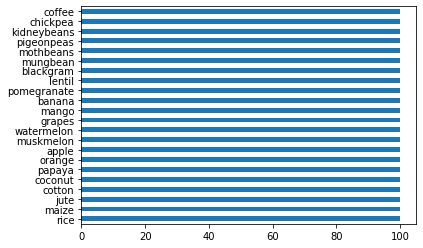

In [9]:
# cek label dataset
label = df["label"].unique()
df["label"].value_counts().plot(kind="barh")
print ("Label data")
plt.show()

Dengan fungsi value_counts() Output diatas menunjukkan label pada dataset memiliki nilai yang seimbang atau tidak ada nilai yang seri.

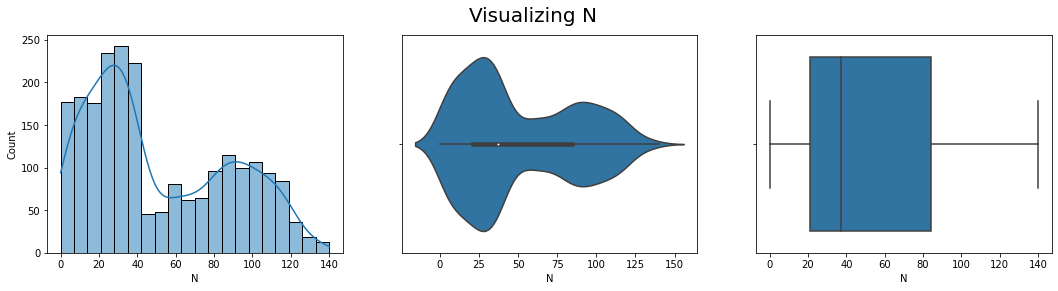

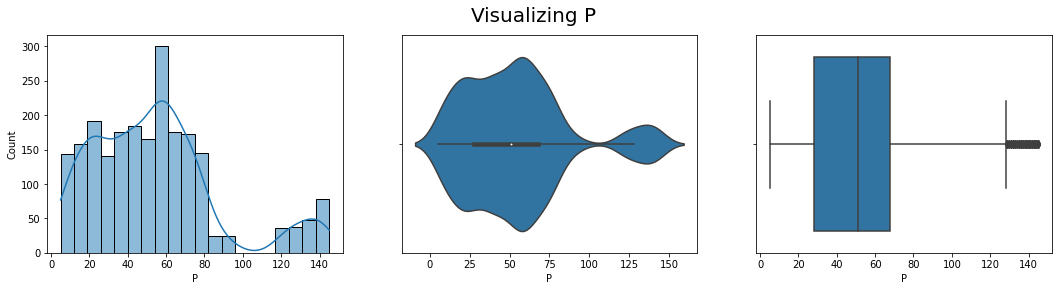

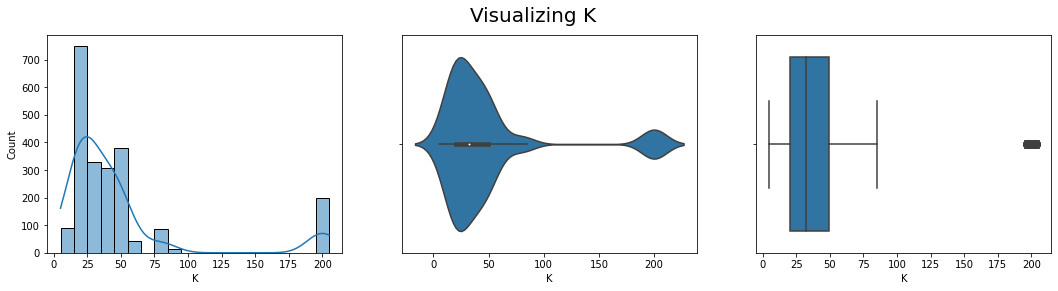

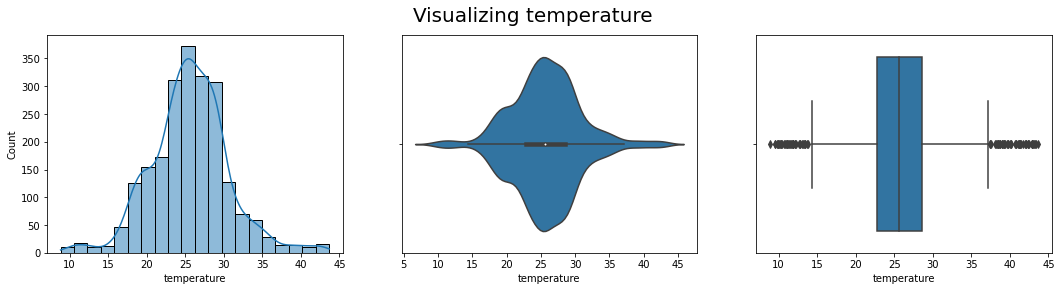

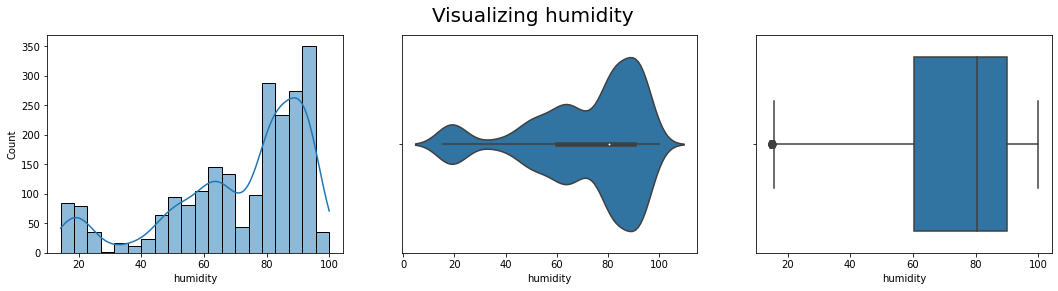

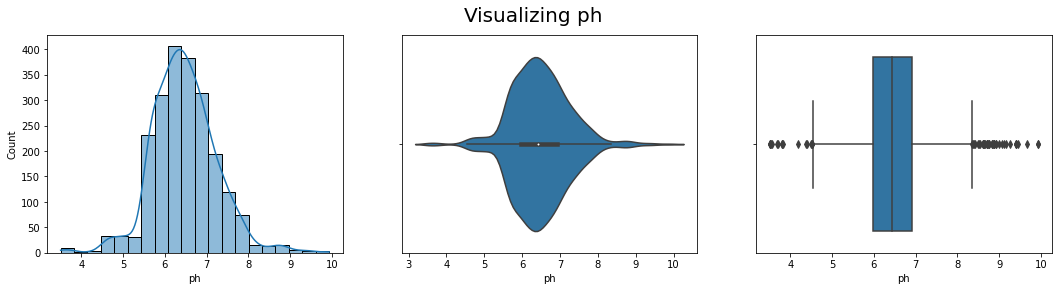

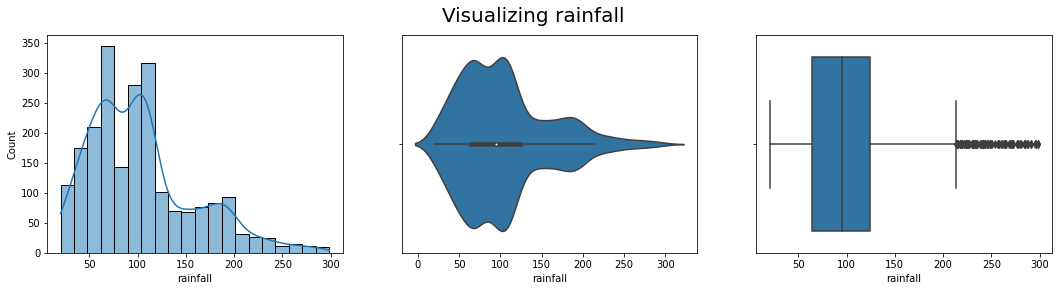

In [10]:
# Deteksi outlier 
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

Grafik di atas mengkonfirmasi bahwa ada outlier pada beberapa data seperti label ph, Kalium (K) dan lainnya.  Untuk menangani outlier disini menggunakan statistik yaitu metode IQR.

In [11]:
# Mengatasi Outlier menggunakan IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

N              63.250000
P              40.000000
K              29.000000
temperature     5.792279
humidity       29.686818
ph              0.951950
rainfall       59.715822
dtype: float64

In [12]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


Hal pertama yang perlu di lakukan adalah membuat batas bawah dan batas atas. Untuk membuat batas bawah, kurangi Q1 dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3

In [13]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [14]:
df.shape

(1768, 8)

Dataset telah bersih dan memiliki 1768 sampel.

# **Data Preparation**

In [15]:
# Membagi data menjadi numerical feature dan target 
Feature = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
Target = df['label']

*   Memisahkan fitur dan target dataset, dimana untuk fitur terdiri dari = N, P, K, temperature, humidity, ph dan rainfall
*   kemudian untuk target nya adalah label pada dataset.


Bivariate Analysis

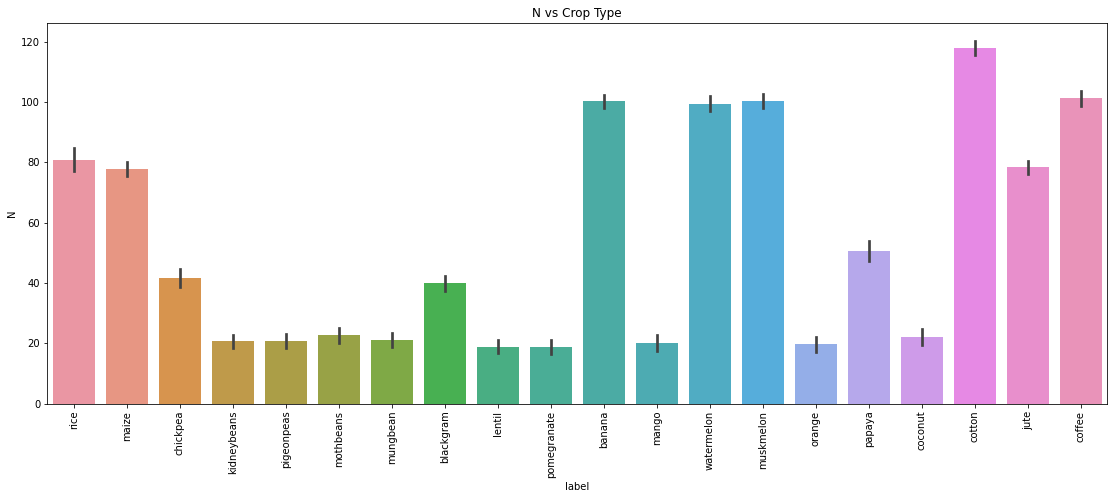

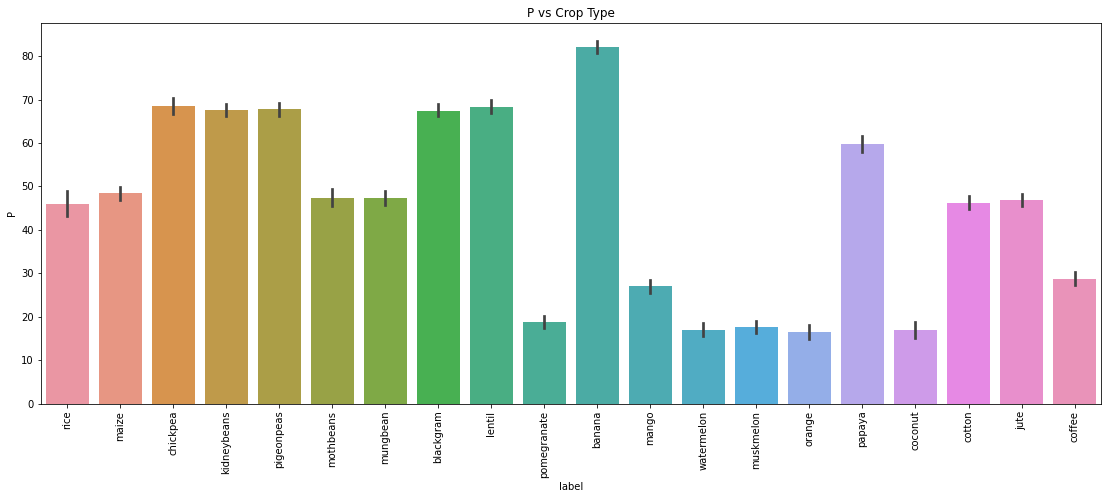

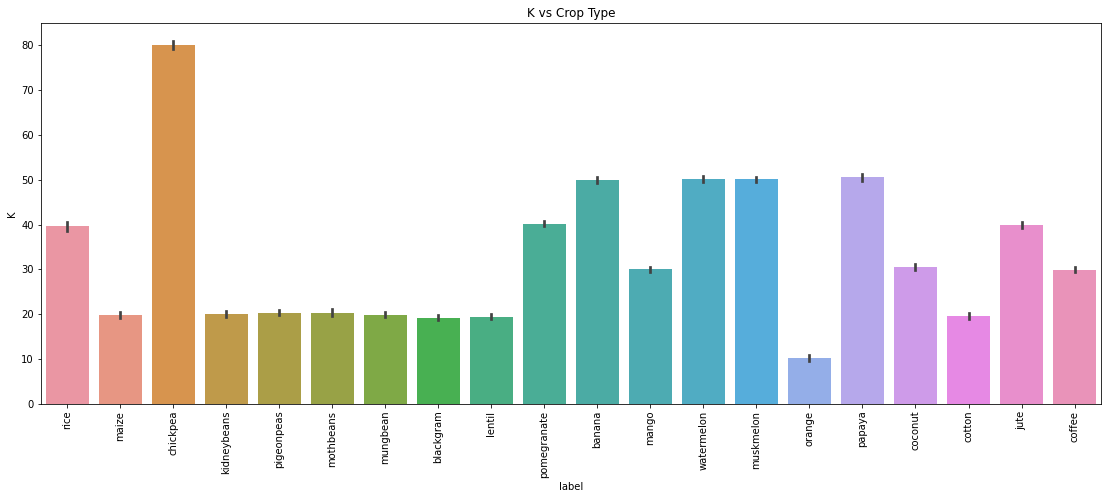

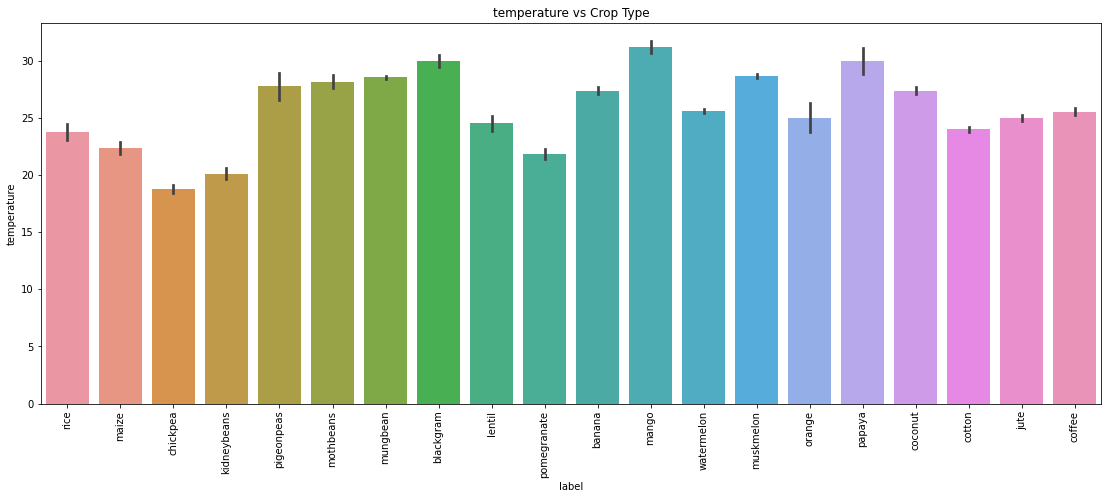

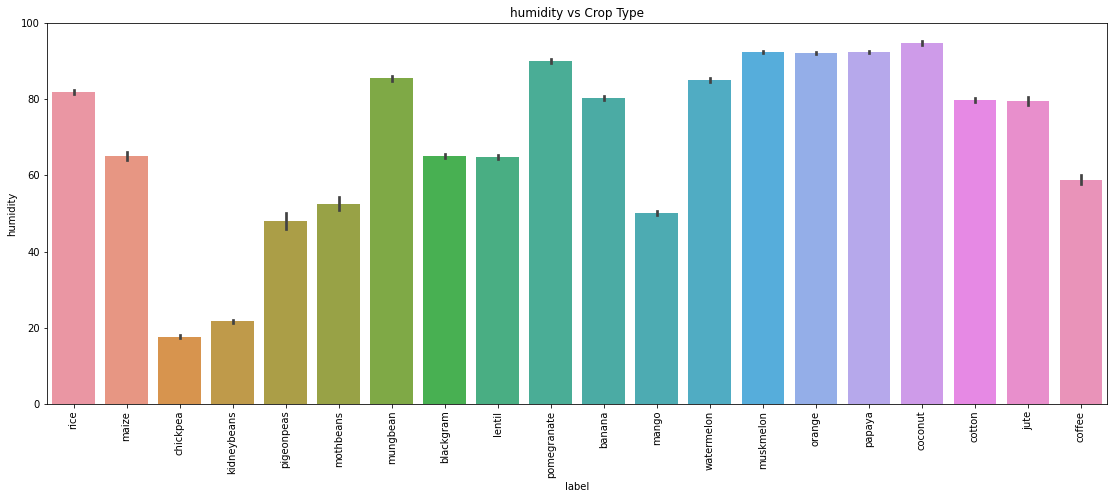

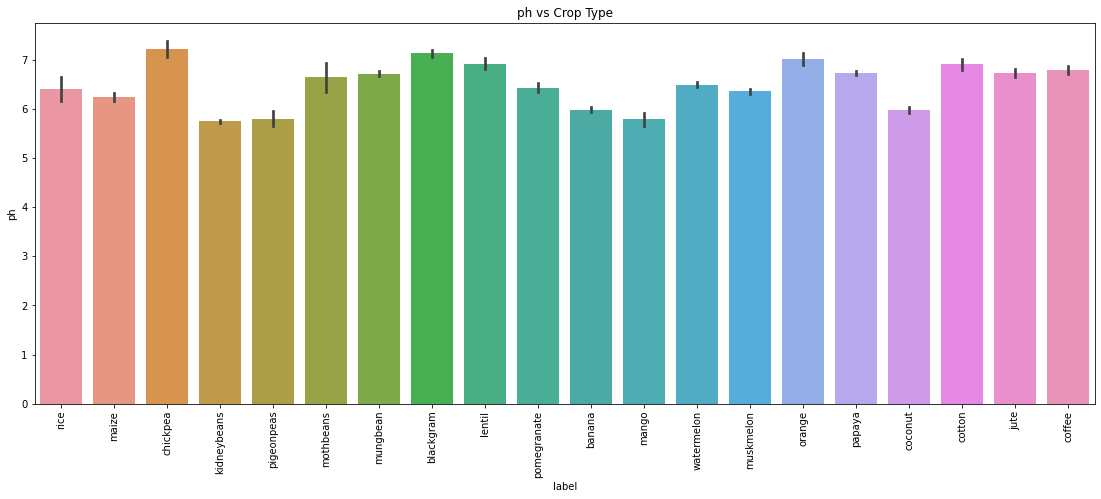

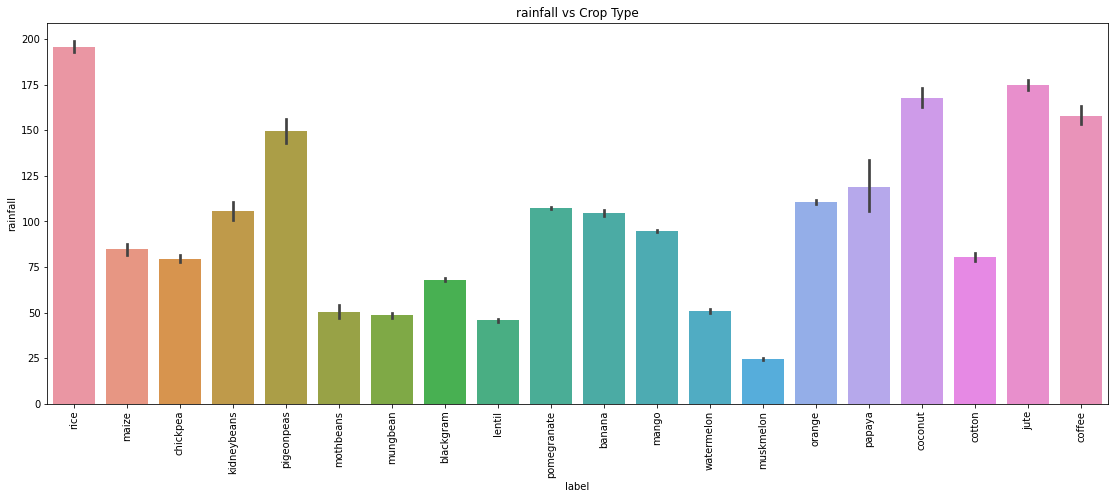

In [16]:
kolom = df.columns[:-1]
for i in kolom:
    plt.figure(figsize=(19,7))
    sns.barplot(x = 'label', y = i, data = df)
    plt.xticks(rotation=90)
    plt.title(f"{i} vs Crop Type")
    plt.show()

Berdasarkan diagram korelasi di atas dapat disimpulkan sebagai berikut :
*   Kapas,pisang,semangka,kopi,  membutuhkan sebagian besar Nitrogen
*   Pisang, membutuhkan sebagian besar Fosfor
*   Buncis membutuhkan sebagian besar Kalium
*   Banana, membutuhkan sebagian besar Fosfor
*   Sebagian besar tanaman membutuhkan iklim yang panas
*   Sebagian besar tanaman membutuhkan iklim yang lembab kecuali buncis
*   Sebagian besar tanaman  membutuhkan pH tinggi di tanah.
*   Padi membutuhkan sebagian besar curah hujan yang sangat besar

In [17]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(Feature.values,Target,
                                                    test_size = 0.2,
                                                    random_state=42,
                                                    shuffle = True)
print("The Shape of x train:",x_train.shape)
print("The Shape of x test:",x_test.shape)
print("The Shape of y train:",y_train.shape)
print("The Shape of y test:",y_test.shape)

The Shape of x train: (1414, 7)
The Shape of x test: (354, 7)
The Shape of y train: (1414,)
The Shape of y test: (354,)


*   Test_size : Proporsi total sampel data test sebesar 20 % dan train 80 %
*   random_state : Mengontrol pengacakan yang diterapkan ke data sebelum menerapkan split
*   shuffle : Mengacak dataset untuk menghindari bias

# **Model Development**

Pada tahap ini menggunakan algoritma machine learning K-Nearest Neighbor dengan menerapkan hyperparameter tuning untuk mencari nilai 'k' yang terbaik dari beberapa kriteria yang ada.

In [18]:
# Melatih model dengan k-nearest neighbors
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
acc = []
model = []
# Find Best K
k = range(1,50,2) #(1,3,5,7...49)
testing_accuracy = []
training_accuracy = []
score = 0
for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
  pipe_knn.fit(x_train, y_train)
  y_pred_train = pipe_knn.predict(x_train)
  training_accuracy.append(accuracy_score(y_train, y_pred_train))
  y_pred_test = pipe_knn.predict(x_test)
  acc_score = accuracy_score(y_test,y_pred_test)
  testing_accuracy.append(acc_score)
if score < acc_score:
  score = acc_score
  best_k = i
print('Best Accuracy Score', round(score,4), 'Best K-Score', best_k)



Best Accuracy Score 0.9124 Best K-Score 49


Kode diatas menunjukkan untuk memperoleh hasil akurasi yang maksimal, kita tentukan K sementara terlebih dahulu sebelum dilakukan proses optimalisasi model dengan memilih parameter terbaik (hyperparameter tuning) sehingga K ini bersifat sementara.

In [20]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      banana       0.91      1.00      0.95        21
   blackgram       0.73      0.96      0.83        23
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        18
      cotton       0.86      1.00      0.92        18
        jute       0.73      1.00      0.84        16
 kidneybeans       1.00      1.00      1.00        22
      lentil       0.77      0.94      0.85        18
       maize       1.00      0.84      0.91        19
       mango       0.82      1.00      0.90        18
   mothbeans       1.00      0.43      0.60        14
    mungbean       0.95      1.00      0.97        18
   muskmelon       0.95      1.00      0.97        18
      orange       1.00      1.00      1.00        14
      papaya       1.00      0.46      0.63        13
  pigeonpeas       1.00      0.70      0.82        23
 pomegranate       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Hyperparameter Tuning**

In [21]:
# Menghitung akurasi dengan nilai yang berbeda
mean_accuracy = np.zeros(20)
for i in range(1,21):  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    pred = knn.predict(x_test)
    mean_accuracy[i-1] = metrics.accuracy_score(y_test, pred)

mean_accuracy

array([0.98305085, 0.97175141, 0.97175141, 0.97740113, 0.97457627,
       0.97457627, 0.97175141, 0.96892655, 0.96892655, 0.96892655,
       0.96892655, 0.96892655, 0.97175141, 0.97175141, 0.97175141,
       0.97175141, 0.97175141, 0.95762712, 0.95762712, 0.95762712])

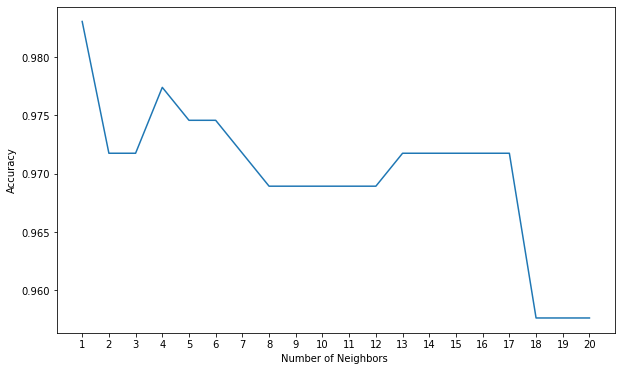

In [22]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_accuracy)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()


Rentan akurasi paling tinggi ada di nomor 1 kemudian turun di nomor 2 , 3 lalu naik diangka 5.


Hyperparameter tuning adalah sebuah proses untuk melakukan optimalisasi parameter pada sebuah model. Untuk proyek ini Parameter yang di gunakan ada 3 yaitu :
*   n_neighbors : menentukan nilai k terbaik berdasarkan nilai yang telah dihitung
*   Weight (bobot) : periksa penambahan bobot seragam atau jarak
*   Metrics : Jarak yang digunakan untuk menghitung kesamaan

In [23]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [24]:
# Model Selection With GridSearchCV
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

GridSearchCV merupakan bagian dari modul scikit-learn yang bertujuan untuk melakukan validasi untuk lebih dari satu model dan hyperparameter masing-masing secara otomatis dan sistematis. 

In [25]:
# fit model train
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [26]:
# find the best score
g_res.best_score_

0.9724126452913024

In [27]:
# hyperparameters dengan skor terbaik
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [28]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=13,
                     weights='distance')

Berdasarkan informasi di atas algoritma KNN memperoleh parameter terbaik yaitu weight = 'distance', metric = 'manhattan' dan algorithm ='brute'

In [29]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.9774011299435028


Jika melihat report dari model sebelum proses tuning, nilai akurasinya dapat mencapai 91%. Meski akurasi yang dihasilkan adalah 91%, namun perhatikan recall pada kelas 'papaya' yang hanya sebesar 30% . Artinya prediksi pada kelas minor ini masih banyak kesalahan. Tetapi setelah di terapkan hyperparameter akurasi meningkat untuk train 100 % dan test 97 %

# **Model Evaluation**

In [30]:
# get a prediction
y_hat = knn.predict(x_train)
y_knn = knn.predict(x_test)

In [31]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.9774011299435028


In [32]:
# After 
g_res.best_estimator_.fit(x_train, y_train)
y_pred_grid = g_res.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        21
   blackgram       0.96      1.00      0.98        23
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        18
      cotton       0.90      1.00      0.95        18
        jute       0.89      1.00      0.94        16
 kidneybeans       1.00      1.00      1.00        22
      lentil       0.86      1.00      0.92        18
       maize       1.00      0.89      0.94        19
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      0.79      0.88        14
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        14
      papaya       1.00      1.00      1.00        13
  pigeonpeas       1.00      0.96      0.98        23
 pomegranate       1.00    

Bandingkan dengan model setelah dilakukan optimalisasi dengan tuning.Selain akurasi yang didapatkan juga meningkat menjadi 98%, recall kelas minor yang sebelumnya 30% meningkat menjadi 100%, Dengan kata lain, dapat dikatakan bahwa dengan menggunakan hyperparameter tuning ini dapat meningkatkan nilai performa model yang digunakan.

In [49]:
data = np.array([[83, # Nitrogen
                  45, # fosfor
                  60, # kalium
                  28, # temperature
                  70.3, # humidity
                  7.0, # pH
                  150.9 # Rrainfall
                  ]]) 
prediction = knn.predict(data)
print("Tanaman yang disarankan untuk kondisi tersebut adalah : ",prediction)

Tanaman yang disarankan untuk kondisi tersebut adalah :  ['jute']
